# 1D probability density function

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from pdffuns import norm1D, norm2D

In [3]:
plt.rcParams['figure.figsize'] = [10, 8]

In [4]:
x = np.arange(-10, 10.5, 0.5).reshape(-1, 1)
mu = 1
sigma = 2
p = norm1D(mu, sigma, x)

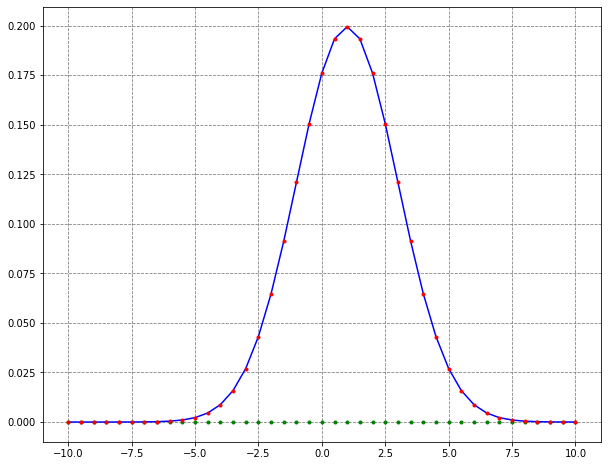

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, x*0, 'g.')
ax.plot(x, p, 'b')
ax.plot(x, p, 'r.')
ax.grid(color='gray', linestyle='--')
plt.show()

# 2D probability density function

In [6]:
x1 = np.arange(-10, 10.5, 0.1).reshape(-1, 1)
x2 = np.arange(-9, 10.5, 0.1).reshape(-1, 1)
mu = np.array([1, 1]).reshape(2, 1)
covariance_matrix = np.array([5, 3, 3, 5]).reshape(2, 2)
p, mesh = norm2D(mu, covariance_matrix, x1, x2)

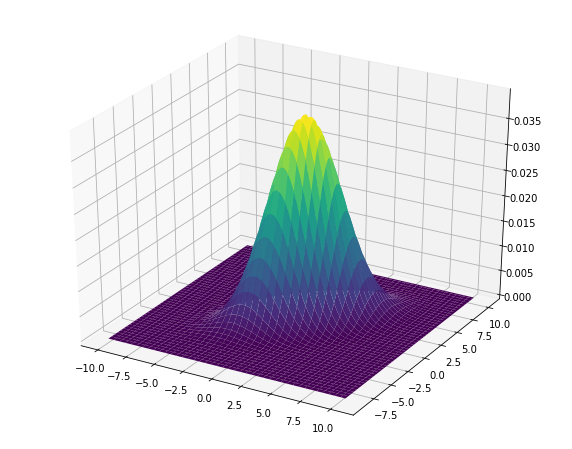

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*mesh, p, antialiased=True, cmap=cm.viridis)

# Code listing

In [8]:
# %load pdffuns.py
import numpy as np

def norm1D(mu, sigma, x):
    n, d = np.shape(x)
    p = np.zeros(np.shape(x))
    for i in np.arange(n):
        p[i] = 1 / (np.sqrt(2 * np.pi) * sigma) * \
            np.exp(-1 / 2 * np.square((x[i] - mu)) / (np.square(sigma)))
    return p


def norm2D(mu, sigma, x1, x2):
    mesh = np.meshgrid(x1, x2, indexing='ij')

    # precompute constant value and initialize result array
    p = np.zeros([len(x1), len(x2)])
    k = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))
    sigma_inv = np.linalg.inv(sigma)

    for i, u in enumerate(x1):
        for j, v in enumerate(x2):
            x = np.array([u, v]).reshape(-1, 1)
            M = (x-mu).T @ sigma_inv @ (x-mu)
            p[i][j] = k * np.exp(-0.5 * M)

    return p, mesh